In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10

# Agentes Reactivos
En este NoteBook se implementaran los agentes:
<ul>
    <li> Evita obstaculos </li>
    <li> Seguidor de bordes </li>
</ul>

Los cuales estaran implementados en el siguiente ambiente

![title](enviroment.png)

De los cuales:
<ul>
    <li>
        Los espacios vacios estaran logicamente representado con 0 
    </li>
    <li>
        Los ocupados por su parte con 1
    </li>
   </ul>
<br>

### Sensores
Para ambos agentes se considera el sensor que llamaremos estado, este sensor contiene la informacion de sus 8 vecinos comenzando desde el vecino superior izquierdo al que llamaremos S1 y continuando en sentido horario.

![title](estado.png)

### Actuadores
De la misma forma, para ambos agentes se considerara un actuador que se encargara de realizar su movimiento en la direccion que dependera del estado que se encuentre el agente


### Agente Evita obstaculos - Implementacion
Para este agente su sistema de produccion es sencillo.

Se tienen 5 casos para considerar con este agente:
<ul>
    <li> Cuando S2 no se encuentra ocupado se movera al Norte</li>
    <li> Cuando S4 no se encuentra ocupado se movera al Este</li>
    <li> Cuando S6 no se encuentra ocupado se movera al Sur</li>
    <li> Cuando S8 no se encuentra ocupado se movera al Oeste</li>
    <li> Cuando ninguno de estos se cumpla simplemente se quedara en su lugar</li>
</ul>

Por lo que en este caso su unidad logica quedaria representada de la siguiente manera para el caso uno:
    
$$ \overline{S_2} $$




### Agente Sigue Bordes - Implementacion
Se crearan algunos patrones para este sistema:
![title](SBprod.png)

Por lo que sabemos que:
    $$ X_1 = \{ S_2, S_3 \} $$
    $$ X_2 = \{ S_4, S_5 \} $$
    $$ X_3 = \{ S_6, S_7 \} $$
    $$ X_4 = \{ S_8, S_1 \} $$
    
Con estos patrones ponemos definir diversas condiciones para asegurar el movimiento correcto del agente:
<ul>
    <li> Cuando se cumpla la siguiente condicion se movera al Este $$x_1\overline{x_2}$$</li>
    <li> Cuando se cumpla la siguiente condicion se movera al Sur $$x_2\overline{x_3}$$</li>
    <li> Cuando se cumpla la siguiente condicion se movera al Oeste $$x_3\overline{x_4}$$</li>
    <li> Cuando se cumpla la siguiente condicion se movera al Norte $$x_4\overline{x_1}$$</li>
    <li> Cuando no se cumpla ninguna condicion se movera al Norte </li>
</ul>

Todas estas condiciones pueden ser representadas mediante la siguiente unidad umbralizada en la cual se plasma el caso 2:

![Unidad_Umbralizada](unidadum.png)

Esta unidad puede ser utilizada para los casos 2,3 ,4 y 5

## Implementacion de funciones en com&uacute;n para ambos agentes

### Genera_Ambiente_Conocido()
Esta funcion genera el ambiente descrito al comienzo de este NoteBook

![title](enviroment.png)

In [79]:
def Genera_Ambiente_Conocido():
    return np.array(
[[0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,1,1,0,0,1,1,0,0,0,0,0,0],
[0,0,1,1,0,0,1,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,1,1,1,0,0,0,1,1,1],
[0,0,0,0,0,1,1,1,0,0,0,1,1,1],
[0,0,0,0,0,1,1,1,0,0,0,1,1,1]])

### Get_Status(pos,enviroment)
Esta funci&oacute;n obtiene el estado que percibe el agente, podria considerarse como un sensor

Recibe:
<ul>
    <li> La posici&oacute;n en la que se encuentra el agente </li>
    <li> El ambiente </li>
</ul>

Esta funci&oacute;n regresa
<ul>
    <li> El estado </li>
</ul>

In [80]:
def Get_Status(pos,enviroment):
    S = []
    vals = [[-1,-1],[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1],[0,-1]]
    for p in vals:
        if (pos[0] + p[0] >= 0  and pos[1] + p[1] >= 0 )and (pos[0] + p[0] < len(enviroment) and pos[1] + p[1] < len(enviroment[1]) ):
            S.append(enviroment[pos[0] + p[0]][pos[1] + p[1]])
        else:
            S.append(1)
    return S

### TLU( S,W, teta)
Esta funcion representa la unidad umbralizada.
Recibe:
<ul> 
    <li> El estado que percibe el agente </li>
    <li> Los pesos de acuerdo al caso al que este evaluando donde:
        <ul>
            <li> Los valores en el estado que nos interesa saber que se cumplan tendran el valor de 1</li>
            <li> Los valores en el estado que nos interesa saber que no se cumplan tendran el valor de -1 </li>
            <li> Los demas tendran un valor de 0 </li>
        </ul>
    </li>
    <li> El umbral que debe superar </li>
</ul>

Regresa: 
<ul> 
    <li> Verdadero cuando se supera el umbral </li>
    <li> Falso en caso contrario</li>
</ul>

In [81]:
def TLU(S,W,teta):
        res = 0
        p = S * W
        res = np.sum(p)
        
        if res >= teta:
            return True
        else:
            return False

### Genera_Movimiento(agente,mov)
Esta funcion realiza el movimiento del agente.

Recibe:
<ul>
    <li> El agente </li>
    <li> El movimiento que se aplicar&aacute;  </li>
</ul>

Regresa:
<ul>
    <li> El agente con su nueva posici&oacute;n </li>
</ul>


In [89]:
def Genera_Movimiento(agente,mov):

    agente[0] += mov[1]
    agente[1] += mov[0]
    plt.scatter(agente[1],agente[0],c="WHITE")
    return agente

### Genera_Agentes( cant )
Esta funcion genera una cantidad dada de agentes

In [118]:
def Genera_Agentes(cant):
    agentes = []
    for i in range(cant):
        x = np.random.randint(low = 0, high = 11)
        y = np.random.randint(low = 0, high = 13)
        new_ag = [x,y]
        agentes.append(new_ag)
    return agentes

## Implementacion del Agente Evita Obstaculos

In [139]:
def AgenteEvitaObstaculos(S):
    mov = [0,0]
    
    if TLU(S[1],[-2],0):

        mov = [0,-1]
        
    elif TLU(S[3],[-2],0):

        mov = [1,0]
        
    elif TLU(S[5],[-2],0):

        mov = [0,1]
        
    elif TLU(S[7],[-2],0):

        mov = [-1,0]

    return mov

## Resultados del Agente Evita Obstaculos

Notas:
<ul>
    <li> La posicion inicial del agente esta marcada por un scatter azul </li>
    <li> Es posible que inicien dentro de un obstaculo debido a la posicion aleatoria </li>
</ul>

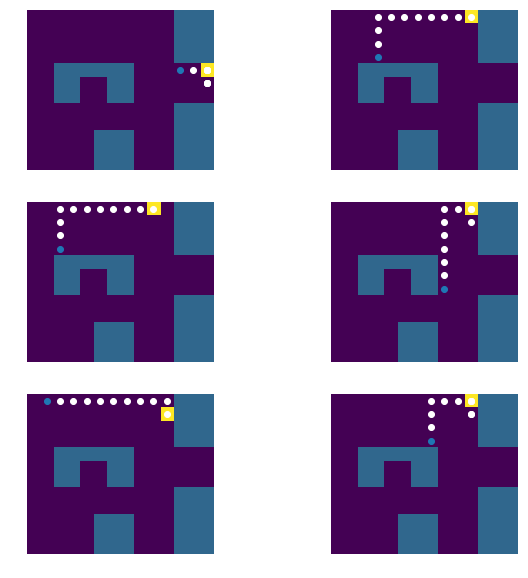

In [138]:
Agentes = Genera_Agentes(6)
for i,agente in enumerate(Agentes):
    plt.subplot(3,2,i+1)
    plt.axis("off")
    enviromenta = Genera_Ambiente_Conocido()
    plt.scatter(agente[1],agente[0])
    for i in range(10):
        Status = Get_Status(agente,enviromenta)
        mov = AgenteEvitaObstaculos(Status)
        agente = Genera_Movimiento(agente,mov)
    enviromenta[agente[0],agente[1]] = 3
    plt.imshow(enviromenta)

## Implementacion del Agente Sigue Bordes

In [144]:
def AgenteSigueBordes(enviroment,status):
    W = np.array([[-2,1,-2,1,-2,1,-2,1],[0,1,1,-2,-2,0,0,0],[0,0,0,1,1,-2,-2,0],[-2,0,0,0,1,1,0,-2],[0,-2,-2,0,0,1,1,0]])
    teta = .5
    mov = [0,0]
    
    
    if TLU(status,W[0],teta):
        
        print "Noop"
    
    elif TLU(status,W[1],teta):

        mov = [1,0]
    
    elif TLU(status,W[2],teta):

        mov = [0,1]
    
    elif TLU(status,W[3],teta):

        mov = [-1,0]
    
    elif TLU(status,W[4],teta):

        mov = [0,-1]
        
    else:
        mov = [0,-1]

    return mov

## Resultados del Agente Sigue Bordes
Notas:
<ul>
    <li> La posicion inicial del agente esta marcada por un scatter azul </li>
    <li> Es posible que inicien dentro de un obstaculo debido a la posicion aleatoria </li>
</ul>

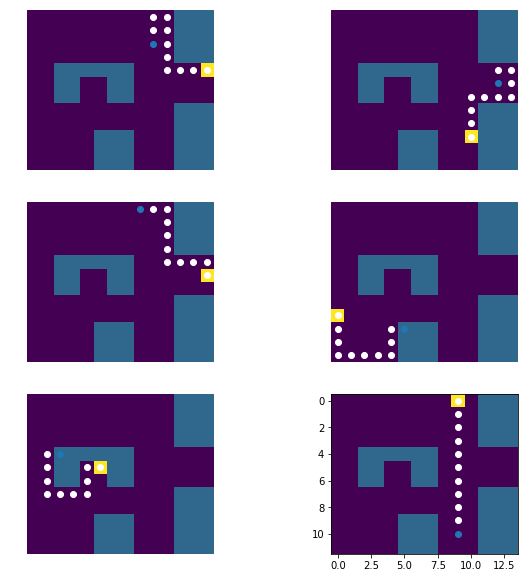

In [148]:
Agentes = Genera_Agentes(6)

for i,agente in enumerate(Agentes):
    plt.axis("off")
    plt.subplot(3,2,i+1)
    enviromenta = Genera_Ambiente_Conocido()
    plt.scatter(agente[1],agente[0])
    for i in range(10):
        Status = Get_Status(agente,enviromenta)
        mov = AgenteSigueBordes(enviromenta,Status)
        agente = Genera_Movimiento(agente,mov)
    enviromenta[agente[0],agente[1]] = 3
    plt.imshow(enviromenta)